In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #importing libraries

In [4]:
covid=pd.read_csv("linear-comprehensive-covid-data.csv")
covid.head()
# reading the data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,24-02-2020,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,25-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,26-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,27-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,28-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [5]:
covid.shape #finding the rows and columns in data

(74866, 59)

In [6]:
covid.columns #displaying the column names in the data

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [7]:
covid.info() #getting the information about the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74866 entries, 0 to 74865
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               74866 non-null  object 
 1   continent                              71169 non-null  object 
 2   location                               74866 non-null  object 
 3   date                                   74866 non-null  object 
 4   total_cases                            73719 non-null  float64
 5   new_cases                              73717 non-null  float64
 6   new_cases_smoothed                     72716 non-null  float64
 7   total_deaths                           64490 non-null  float64
 8   new_deaths                             64648 non-null  float64
 9   new_deaths_smoothed                    72716 non-null  float64
 10  total_cases_per_million                73317 non-null  float64
 11  ne

In [8]:
covid["location"].value_counts() # location value count

Mexico              439
Argentina           439
Thailand            436
Taiwan              424
South Korea         419
                   ... 
Anguilla             23
Montserrat           16
Falkland Islands     16
Northern Cyprus       9
Saint Helena          1
Name: location, Length: 215, dtype: int64

In [9]:
covid.isna().any() # finding the null values

iso_code                                 False
continent                                 True
location                                 False
date                                     False
total_cases                               True
new_cases                                 True
new_cases_smoothed                        True
total_deaths                              True
new_deaths                                True
new_deaths_smoothed                       True
total_cases_per_million                   True
new_cases_per_million                     True
new_cases_smoothed_per_million            True
total_deaths_per_million                  True
new_deaths_per_million                    True
new_deaths_smoothed_per_million           True
reproduction_rate                         True
icu_patients                              True
icu_patients_per_million                  True
hosp_patients                             True
hosp_patients_per_million                 True
weekly_icu_ad

In [10]:
covid.isna().sum() # finding the sum of null values in each columns

iso_code                                     0
continent                                 3697
location                                     0
date                                         0
total_cases                               1147
new_cases                                 1149
new_cases_smoothed                        2150
total_deaths                             10376
new_deaths                               10218
new_deaths_smoothed                       2150
total_cases_per_million                   1549
new_cases_per_million                     1551
new_cases_smoothed_per_million            2547
total_deaths_per_million                 10765
new_deaths_per_million                   10607
new_deaths_smoothed_per_million           2547
reproduction_rate                        14478
icu_patients                             67107
icu_patients_per_million                 67107
hosp_patients                            65529
hosp_patients_per_million                65529
weekly_icu_ad

In [11]:
covid=covid.reindex(sorted(covid.columns), axis=1) #sorting the columns

In [12]:
covid.info()# finding the columns whether it i s sorted or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74866 entries, 0 to 74865
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   aged_65_older                          67190 non-null  float64
 1   aged_70_older                          67589 non-null  float64
 2   cardiovasc_death_rate                  68812 non-null  float64
 3   continent                              71169 non-null  object 
 4   date                                   74866 non-null  object 
 5   diabetes_prevalence                    69694 non-null  float64
 6   extreme_poverty                        46529 non-null  float64
 7   female_smokers                         54078 non-null  float64
 8   gdp_per_capita                         68194 non-null  float64
 9   handwashing_facilities                 34542 non-null  float64
 10  hosp_patients                          9337 non-null   float64
 11  ho

In [13]:
covid.drop(['icu_patients','icu_patients_per_million','hosp_patients','hosp_patients_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million','new_tests','total_tests','total_tests_per_thousand','new_tests_per_thousand','new_tests_smoothed','new_tests_smoothed_per_thousand','positive_rate','tests_per_case','tests_units','total_vaccinations','people_vaccinated','people_fully_vaccinated','new_vaccinations','new_vaccinations_smoothed','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','new_vaccinations_smoothed_per_million'
           ] ,axis=1,inplace=True)#removing unwanted data

In [14]:
covid.info() #finding the whether the unwanted is removed or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74866 entries, 0 to 74865
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   aged_65_older                    67190 non-null  float64
 1   aged_70_older                    67589 non-null  float64
 2   cardiovasc_death_rate            68812 non-null  float64
 3   continent                        71169 non-null  object 
 4   date                             74866 non-null  object 
 5   diabetes_prevalence              69694 non-null  float64
 6   extreme_poverty                  46529 non-null  float64
 7   female_smokers                   54078 non-null  float64
 8   gdp_per_capita                   68194 non-null  float64
 9   handwashing_facilities           34542 non-null  float64
 10  hospital_beds_per_thousand       62969 non-null  float64
 11  human_development_index          68755 non-null  float64
 12  iso_code          

In [15]:
print(len(covid.columns))#length of columns

33


In [16]:
Slovakia_case=covid[covid["location"]=="Slovakia"]#retreving the slovakia data

In [17]:
Slovakia_case.head()

,aged_65_older,aged_70_older,cardiovasc_death_rate,continent,date,diabetes_prevalence,extreme_poverty,female_smokers,gdp_per_capita,handwashing_facilities,...,new_deaths_smoothed,new_deaths_smoothed_per_million,population,population_density,reproduction_rate,stringency_index,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million
60393,15.07,9.167,287.959,Europe,06-03-2020,7.29,0.7,23.1,30155.152,NaN,...,NaN,NaN,5459643.0,113.128,NaN,16.67,1.0,0.183,NaN,NaN
60394,15.07,9.167,287.959,Europe,07-03-2020,7.29,0.7,23.1,30155.152,NaN,...,NaN,NaN,5459643.0,113.128,NaN,16.67,1.0,0.183,NaN,NaN
60395,15.07,9.167,287.959,Europe,08-03-2020,7.29,0.7,23.1,30155.152,NaN,...,NaN,NaN,5459643.0,113.128,NaN,16.67,3.0,0.549,NaN,NaN
60396,15.07,9.167,287.959,Europe,09-03-2020,7.29,0.7,23.1,30155.152,NaN,...,NaN,NaN,5459643.0,113.128,NaN,22.22,3.0,0.549,NaN,NaN
60397,15.07,9.167,287.959,Europe,10-03-2020,7.29,0.7,23.1,30155.152,NaN,...,NaN,NaN,5459643.0,113.128,NaN,33.33,7.0,1.282,NaN,NaN


In [18]:
Slovakia_case.isnull().sum()#finding the sum of null values in slovakia data

aged_65_older                        0
aged_70_older                        0
cardiovasc_death_rate                0
continent                            0
date                                 0
diabetes_prevalence                  0
extreme_poverty                      0
female_smokers                       0
gdp_per_capita                       0
handwashing_facilities             374
hospital_beds_per_thousand           0
human_development_index              0
iso_code                             0
life_expectancy                      0
location                             0
male_smokers                         0
median_age                           0
new_cases                            0
new_cases_per_million                0
new_cases_smoothed                   5
new_cases_smoothed_per_million       5
new_deaths                          26
new_deaths_per_million              26
new_deaths_smoothed                  5
new_deaths_smoothed_per_million      5
population               

In [19]:
Slovakia_case['handwashing_facilities'] = Slovakia_case['handwashing_facilities'].fillna(0)
Slovakia_case['new_deaths'] = Slovakia_case['new_deaths'].fillna(Slovakia_case['new_deaths'].median())
Slovakia_case['new_cases_smoothed'] = Slovakia_case['new_cases_smoothed'].fillna(Slovakia_case['new_cases_smoothed'].median())
Slovakia_case['new_cases_smoothed_per_million'] = Slovakia_case['new_cases_smoothed_per_million'].fillna(Slovakia_case['new_cases_smoothed_per_million'].median())
Slovakia_case['new_deaths_per_million'] = Slovakia_case['new_deaths_per_million'].fillna(Slovakia_case['new_deaths_per_million'].median())
Slovakia_case['reproduction_rate'] = Slovakia_case['reproduction_rate'].fillna(Slovakia_case['reproduction_rate'].median())
Slovakia_case['stringency_index'] = Slovakia_case['stringency_index'].fillna(Slovakia_case['stringency_index'].median())
Slovakia_case['new_deaths_smoothed'] = Slovakia_case['new_deaths_smoothed'].fillna(Slovakia_case['new_deaths_smoothed'].median())
Slovakia_case['new_deaths_smoothed_per_million'] = Slovakia_case['new_deaths_smoothed_per_million'].fillna(Slovakia_case['new_deaths_smoothed_per_million'].median())
Slovakia_case['total_deaths'] = Slovakia_case['total_deaths'].fillna(Slovakia_case['total_deaths'].median())
Slovakia_case['total_deaths_per_million'] = Slovakia_case['total_deaths_per_million'].fillna(Slovakia_case['total_deaths_per_million'].median())
#replacing the null values by entering 0 value for hand wash facilities column
#replacing the null values by median for the remaining null value columns

<ipython-input-19-4469f81b3528>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Slovakia_case['handwashing_facilities'] = Slovakia_case['handwashing_facilities'].fillna(0)
<ipython-input-19-4469f81b3528>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Slovakia_case['new_deaths'] = Slovakia_case['new_deaths'].fillna(Slovakia_case['new_deaths'].median())
<ipython-input-19-4469f81b3528>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [20]:
Slovakia_case.isnull().sum()#here we can see there are no values present  in each column

aged_65_older                      0
aged_70_older                      0
cardiovasc_death_rate              0
continent                          0
date                               0
diabetes_prevalence                0
extreme_poverty                    0
female_smokers                     0
gdp_per_capita                     0
handwashing_facilities             0
hospital_beds_per_thousand         0
human_development_index            0
iso_code                           0
life_expectancy                    0
location                           0
male_smokers                       0
median_age                         0
new_cases                          0
new_cases_per_million              0
new_cases_smoothed                 0
new_cases_smoothed_per_million     0
new_deaths                         0
new_deaths_per_million             0
new_deaths_smoothed                0
new_deaths_smoothed_per_million    0
population                         0
population_density                 0
r

In [21]:
Slovakia_case['recovered_cases'] = Slovakia_case['total_cases']-Slovakia_case['total_deaths'] - Slovakia_case['new_cases']
total_recovered=Slovakia_case["recovered_cases"].sum(axis = 0, skipna = True)
print("Total Number of cases recovered:", Slovakia_case)
#creating a dependent variable based on independent variable and printing the dependent variable

Total Number of cases recovered:        aged_65_older  aged_70_older  cardiovasc_death_rate continent  \
60393          15.07          9.167                287.959    Europe   
60394          15.07          9.167                287.959    Europe   
60395          15.07          9.167                287.959    Europe   
60396          15.07          9.167                287.959    Europe   
60397          15.07          9.167                287.959    Europe   
...              ...            ...                    ...       ...   
60762          15.07          9.167                287.959    Europe   
60763          15.07          9.167                287.959    Europe   
60764          15.07          9.167                287.959    Europe   
60765          15.07          9.167                287.959    Europe   
60766          15.07          9.167                287.959    Europe   

             date  diabetes_prevalence  extreme_poverty  female_smokers  \
60393  06-03-2020          

<ipython-input-21-9c2c55ca73f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Slovakia_case['recovered_cases'] = Slovakia_case['total_cases']-Slovakia_case['total_deaths'] - Slovakia_case['new_cases']


In [22]:
Slovakia_case['active_case'] = Slovakia_case['total_cases'] - Slovakia_case['recovered_cases']
#creating a dependent variable based on independent variables

<ipython-input-22-38c90098ed49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Slovakia_case['active_case'] = Slovakia_case['total_cases'] - Slovakia_case['recovered_cases']


In [23]:
active_cases=Slovakia_case["active_case"].sum(axis = 0, skipna = True)
print("Total Number of active_case:", active_cases)
#printing the dependent variable

Total Number of active_case: 787677.0


In [24]:
Slovakia_case['cumulated_deaths']=Slovakia_case['total_deaths']-Slovakia_case['new_deaths']
#creating a dependent variable based on independent variables

<ipython-input-24-dcb4bcae1be5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Slovakia_case['cumulated_deaths']=Slovakia_case['total_deaths']-Slovakia_case['new_deaths']


In [25]:
cumulated_death=Slovakia_case["cumulated_deaths"].sum(axis = 0, skipna = True)
print("Total Number of cumulated deaths:", cumulated_death)
#printing the dependent variable

Total Number of cumulated deaths: 441633.0


In [26]:
Slovakia_case['total_beds_available'] = Slovakia_case['hospital_beds_per_thousand']
hospital_beds=Slovakia_case["total_beds_available"]

print("Total Number of available bed at hospital", hospital_beds,".")

Total Number of available bed at hospital 60393    5.82
60394    5.82
60395    5.82
60396    5.82
60397    5.82
         ... 
60762    5.82
60763    5.82
60764    5.82
60765    5.82
60766    5.82
Name: total_beds_available, Length: 374, dtype: float64 .


<ipython-input-26-e467b1854409>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Slovakia_case['total_beds_available'] = Slovakia_case['hospital_beds_per_thousand']


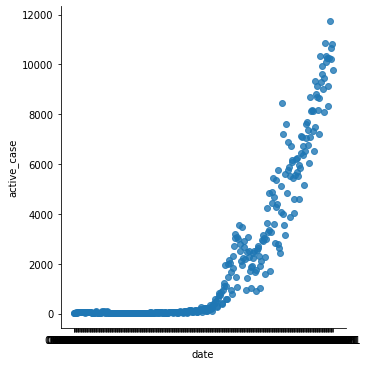

In [27]:
sns.lmplot(x='date',y='active_case',fit_reg=False,data=Slovakia_case)
#active cases per day 

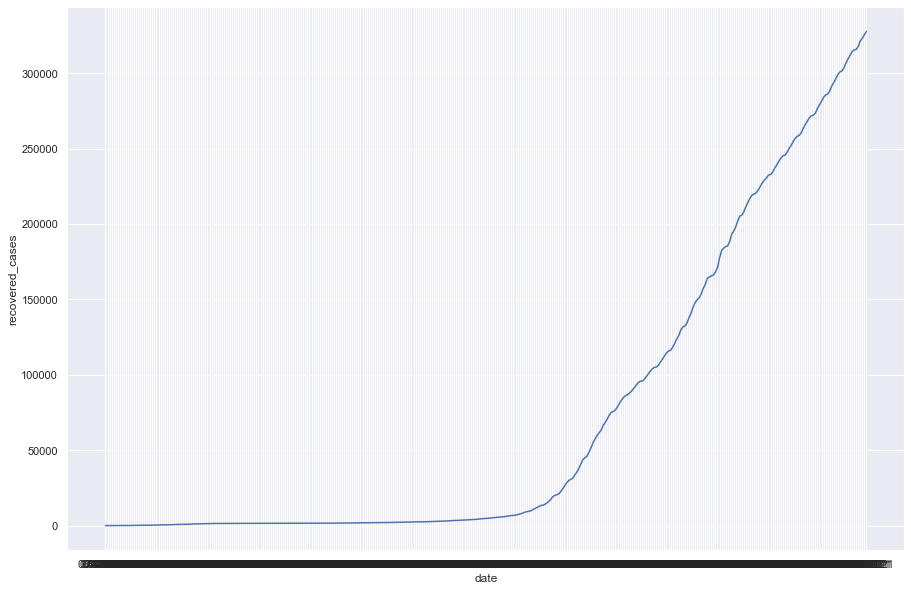

In [28]:
#recovered cases  per day
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='date',y='recovered_cases',data=Slovakia_case)
plt.show()

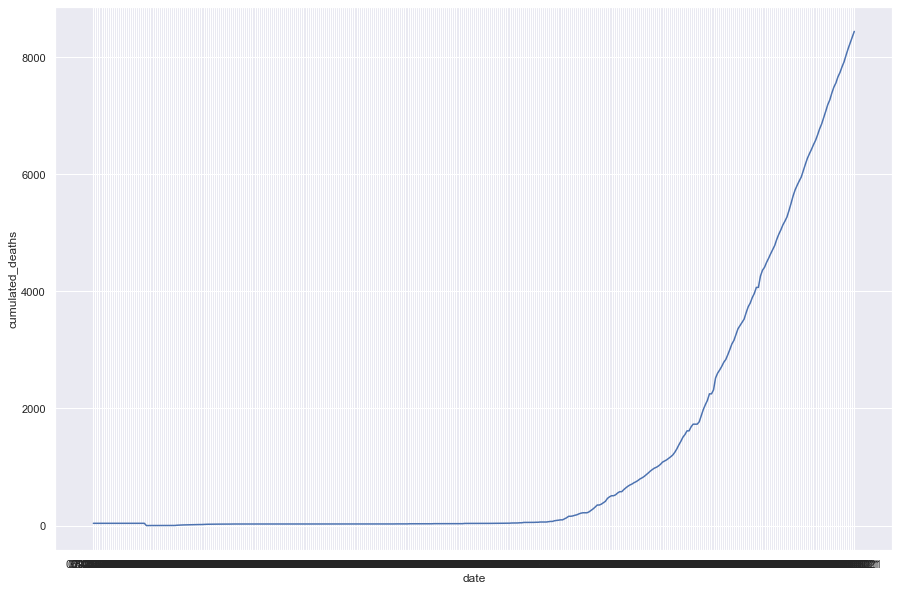

In [29]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='date',y='cumulated_deaths',data=Slovakia_case)
plt.show()
#cumulated deaths per day

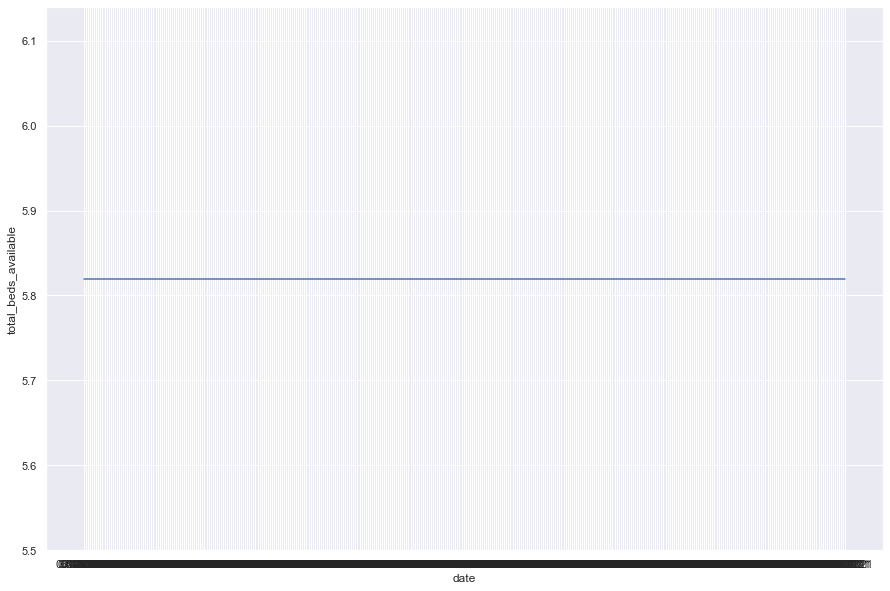

In [30]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='date',y='total_beds_available',data=Slovakia_case)
plt.show()
#total  hospital beds available  per day

In [31]:
Slovakia_case.describe()#univariate analysis

,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,extreme_poverty,female_smokers,gdp_per_capita,handwashing_facilities,hospital_beds_per_thousand,human_development_index,...,reproduction_rate,stringency_index,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,recovered_cases,active_case,cumulated_deaths,total_beds_available
count,3.740000e+02,3.740000e+02,3.740000e+02,374.00,3.740000e+02,3.740000e+02,3.740000e+02,374.0,3.740000e+02,374.00,...,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,3.740000e+02
mean,1.507000e+01,9.167000e+00,2.879590e+02,7.29,7.000000e-01,2.310000e+01,3.015515e+04,0.0,5.820000e+00,0.86,...,1.130000,57.812086,73280.117647,13422.144572,1203.673797,220.467545,71174.029412,2106.088235,1180.836898,5.820000e+00
std,3.557473e-15,1.778736e-15,1.138391e-13,0.00,2.223421e-16,7.114946e-15,3.642852e-12,0.0,8.893682e-16,0.00,...,0.204025,17.679602,103901.093482,19030.748612,2186.822792,400.543179,100973.939739,3014.198090,2154.486954,8.893682e-16
min,1.507000e+01,9.167000e+00,2.879590e+02,7.29,7.000000e-01,2.310000e+01,3.015515e+04,0.0,5.820000e+00,0.86,...,0.670000,16.670000,1.000000,0.183000,1.000000,0.183000,-39.500000,15.000000,0.000000,5.820000e+00
25%,1.507000e+01,9.167000e+00,2.879590e+02,7.29,7.000000e-01,2.310000e+01,3.015515e+04,0.0,5.820000e+00,0.86,...,1.020000,37.960000,1528.500000,279.963500,28.000000,5.129000,1500.000000,41.625000,28.000000,5.820000e+00
50%,1.507000e+01,9.167000e+00,2.879590e+02,7.29,7.000000e-01,2.310000e+01,3.015515e+04,0.0,5.820000e+00,0.86,...,1.120000,69.440000,4807.500000,880.552500,39.500000,7.234500,4644.500000,151.500000,39.000000,5.820000e+00
75%,1.507000e+01,9.167000e+00,2.879590e+02,7.29,7.000000e-01,2.310000e+01,3.015515e+04,0.0,5.820000e+00,0.86,...,1.310000,73.150000,126545.500000,23178.346750,1117.500000,204.683750,123022.250000,3153.000000,1099.000000,5.820000e+00
max,1.507000e+01,9.167000e+00,2.879590e+02,7.29,7.000000e-01,2.310000e+01,3.015515e+04,0.0,5.820000e+00,0.86,...,1.470000,87.040000,337503.000000,61817.778000,8528.000000,1562.007000,327707.000000,11746.000000,8440.000000,5.820000e+00


Text(0, 0.5, 'Count')

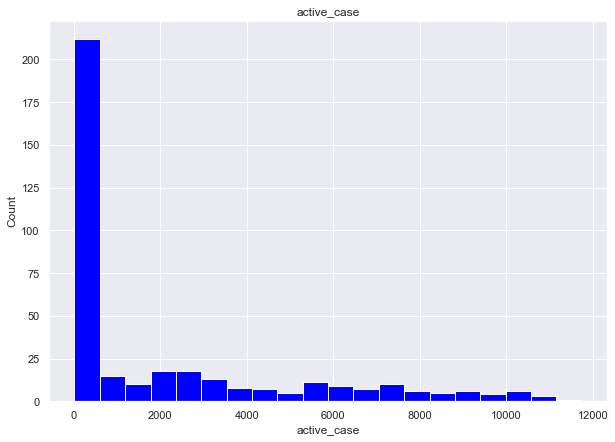

In [32]:
plt.figure(figsize=(10,7))
x=Slovakia_case['active_case']
plt.hist(x,bins=20,color='blue')
plt.title('active_case')
plt.xlabel('active_case')
plt.ylabel('Count')
#univariate analysis

Text(0, 0.5, 'Count')

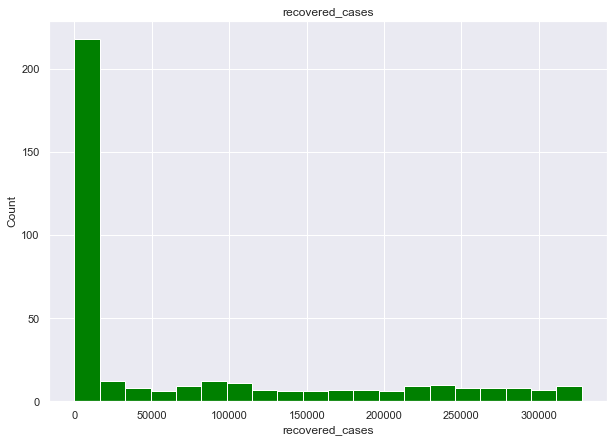

In [33]:
plt.figure(figsize=(10,7))
x=Slovakia_case['recovered_cases']
plt.hist(x,bins=20,color='green')
plt.title('recovered_cases')
plt.xlabel('recovered_cases')
plt.ylabel('Count')
#univariate analysis

Text(0, 0.5, 'Count')

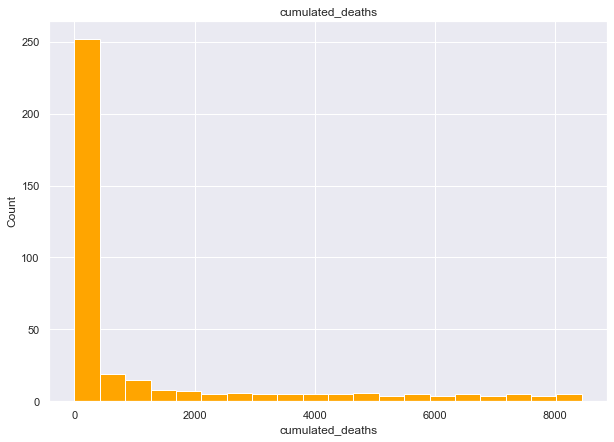

In [34]:
plt.figure(figsize=(10,7))
x=Slovakia_case['cumulated_deaths']
plt.hist(x,bins=20,color='orange')
plt.title('cumulated_deaths')
plt.xlabel('cumulated_deaths')
plt.ylabel('Count')
#univariate analysis

Text(0, 0.5, 'Count')

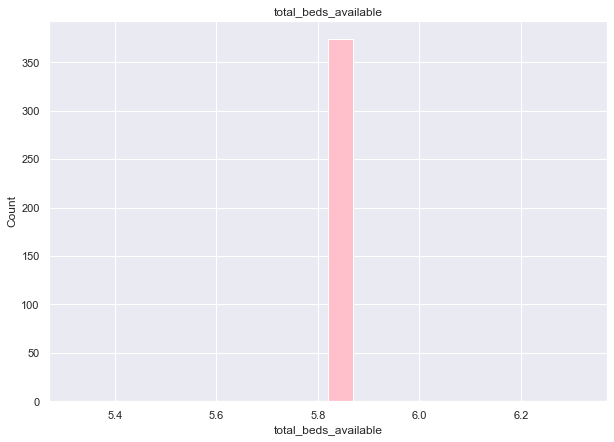

In [35]:
plt.figure(figsize=(10,7))
x=Slovakia_case['total_beds_available']
plt.hist(x,bins=20,color='pink')
plt.title('total_beds_available')
plt.xlabel('total_beds_available')
plt.ylabel('Count')
#univariate analysis

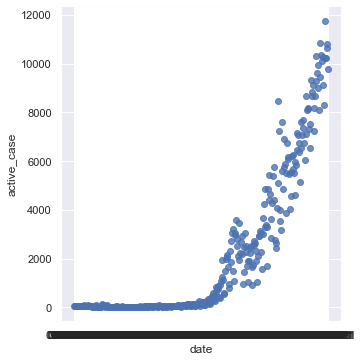

In [36]:
sns.lmplot(x='date',y='active_case',fit_reg=False,data=Slovakia_case)
#by using bivariate analysis we are finding the active cases per day

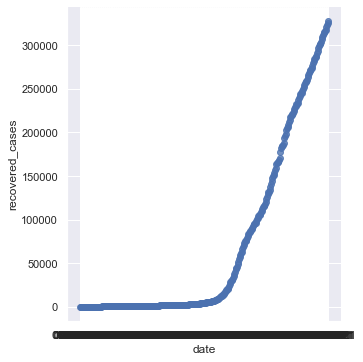

In [37]:
sns.lmplot(x='date',y='recovered_cases',fit_reg=False,data=Slovakia_case)
#by using bivariate analysis we are finding the recovered cases per day

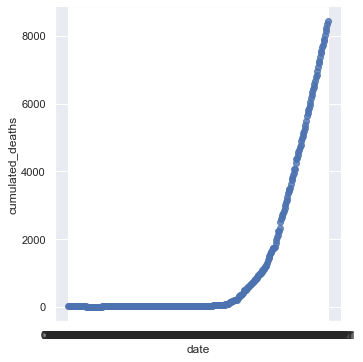

In [38]:
sns.lmplot(x='date',y='cumulated_deaths',fit_reg=False,data=Slovakia_case)
#by using bivariate analysis we are finding the cumulated deaths per day

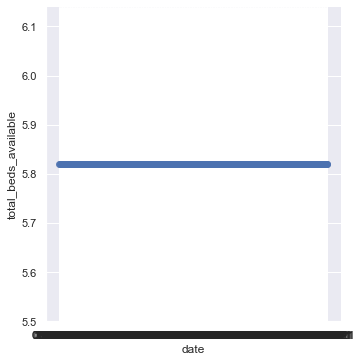

In [39]:
sns.lmplot(x='date',y='total_beds_available',fit_reg=False,data=Slovakia_case)
#by using bivariate analysis we are finding the number of hospital beds available  per day


In [40]:
x_corr = Slovakia_case[['active_case', 'recovered_cases','cumulated_deaths','total_beds_available'
       
        ]].corr()
x_corr
#bivariate analysis 

,active_case,recovered_cases,cumulated_deaths,total_beds_available
active_case,1.000000,0.970272,0.945657,NaN
recovered_cases,0.970272,1.000000,0.952555,NaN
cumulated_deaths,0.945657,0.952555,1.000000,NaN
total_beds_available,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'variation of deaths,active_cases, recovered cases and total_beds_available with respect each day')

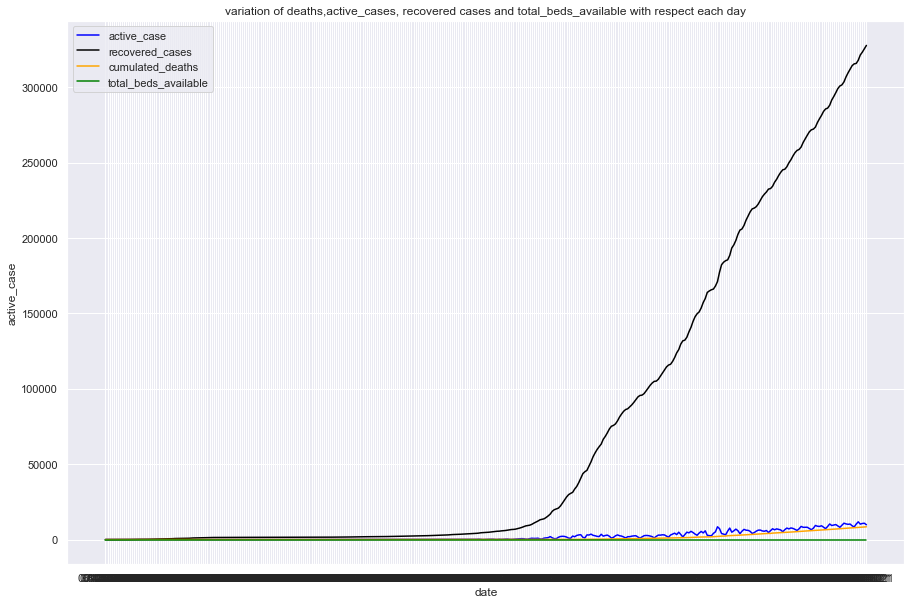

In [44]:
sns.lineplot(x=Slovakia_case.date,y= Slovakia_case.active_case, color="blue", label="active_case", linestyle="-")
sns.lineplot(x=Slovakia_case.date, y= Slovakia_case.recovered_cases ,color="black", label="recovered_cases", linestyle="-")
sns.lineplot(x=Slovakia_case.date, y= Slovakia_case.cumulated_deaths ,color="orange", label="cumulated_deaths", linestyle="-")
sns.lineplot(x=Slovakia_case.date ,y= Slovakia_case.total_beds_available, color="green", label="total_beds_available", linestyle="-").set_title("variation of deaths,active_cases, recovered cases and total_beds_available with respect each day")
#linear regression model predicting active_case, recovered_cases,cumulated_deaths,total_beds_available per day